In [143]:
import numpy as np
import math

points = np.random.uniform(low=-10, high=10, size=(100, 2))
points = np.asarray(points)

In [144]:
# x = np.random.uniform(-10, 10, 300)
# 
# points = []
# 
# for i in x:
#     points.append((i,i**2))
# points = np.asarray(points)

In [145]:
points

array([[-0.62735685,  4.3158337 ],
       [ 9.08125758, -7.53797031],
       [ 4.80744153, -1.81782768],
       [-0.68269991, -5.49185028],
       [-5.39022588,  6.78355637],
       [-6.76823367, -3.21328037],
       [-5.58098014, -0.15472254],
       [ 7.20883811,  0.17423589],
       [ 3.70782644,  4.09741509],
       [-6.49066345,  9.06147658],
       [-5.92691967, -4.49956   ],
       [-1.247318  , -6.16192276],
       [-3.45186735, -2.88316568],
       [ 2.69451927, -1.33360782],
       [ 1.68522395, -9.47191189],
       [ 3.93624959, -5.56962717],
       [-6.28753585, -8.22501308],
       [-5.28684549,  0.67171538],
       [-3.77019709, -1.71066815],
       [-6.93699369,  1.36842113],
       [-9.99124225, -8.36111203],
       [-0.83372265,  5.85165073],
       [-4.68655151,  8.18990288],
       [ 3.73829761,  4.31045529],
       [ 6.98871782, -9.07421791],
       [ 5.89287643,  2.32928729],
       [ 3.22658972,  8.28593305],
       [-9.11173587, -4.57332956],
       [ 8.14915381,

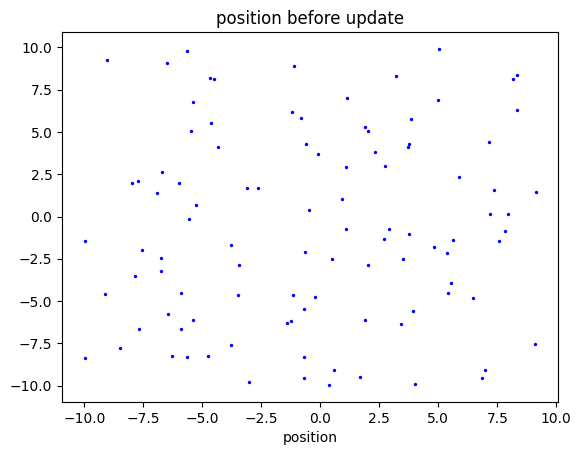

In [146]:
import matplotlib.pyplot as plt

# nums의 최소값과 최대값 구하기
min_num = np.min(points)
max_num = np.max(points)

# 1차원 선 그리기
# plt.figure(figsize=(10, 2))

# nums 값들을 선 위에 점으로 시각화
for point in points:
    plt.scatter(point[0], point[1], color='b', s=2)

plt.title('position before update')
plt.xlabel('position')
plt.show()

In [147]:
from scipy.stats import norm

count = 0

while count < 100:

    # dens = np.zeros(len(points))
    dens = []
    vec = np.zeros((len(points), 2))
    
    for i in range(len(points)):
        sum_pdf = 0
        vec_total = 0
        
        # 여기에 가우시안 넣어야 될듯
        for num2 in points:
            if not np.array_equal(points[i], num2):
                # gaussian 커널로 점들간 거리에 따라 확률추정
                # 이게 벡터의 크기
                distance = np.linalg.norm(points[i] - num2)
                p = norm.pdf(distance, 0, 1)
                # 점 num에서 확률추정
                sum_pdf += p
            
                vec_total += p * (points[i] - num2) / distance
                
        dens.append(sum_pdf / (len(points)-1))
        vec[i] = vec_total
    
    dens /= np.sum(dens)
    points += vec
    count += 1

기울기에 따라 이동하는 방법 필요
어디에다 projection 해야됨??????

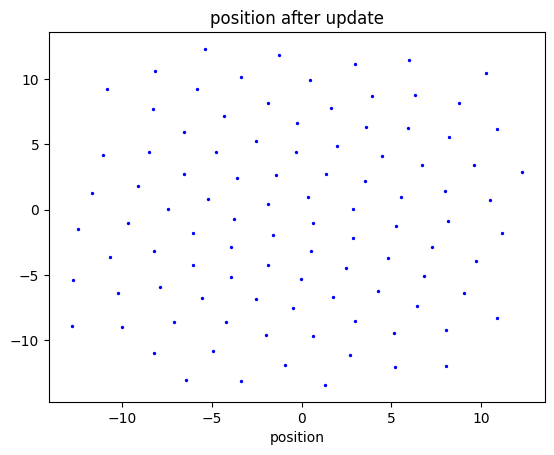

In [148]:
import matplotlib.pyplot as plt

# nums의 최소값과 최대값 구하기
min_num = np.min(points)
max_num = np.max(points)

# 1차원 선 그리기
# plt.figure(figsize=(10, 2))

# nums 값들을 선 위에 점으로 시각화
for point in points:
    plt.scatter(point[0], point[1], color='b', s=2)

plt.title('position after update')
plt.xlabel('position')
plt.show()